In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt

# 1. Basic information of datasets & Data pre-processing

In [2]:
races = pd.read_csv(r"../data/races.csv")
runs = pd.read_csv(r"../data/runs.csv")

In [3]:
runs.head()

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,...,21.59,23.86,24.62,NaN,NaN,83.92,9.7,3.7,118,2
1,0,2,2157,8,0.0,5.75,3,NZ,Gelding,60,...,21.99,23.30,23.70,NaN,NaN,83.56,16.0,4.9,164,57
2,0,3,858,7,0.0,4.75,3,NZ,Gelding,60,...,21.59,23.90,24.22,NaN,NaN,83.40,3.5,1.5,137,18
3,0,4,1853,9,0.0,6.25,3,SAF,Gelding,60,...,21.83,23.70,24.00,NaN,NaN,83.62,39.0,11.0,80,59
4,0,5,2796,6,0.0,3.75,3,GB,Gelding,60,...,21.75,23.22,23.50,NaN,NaN,83.24,50.0,14.0,9,154


In [4]:
races.head()

,race_id,date,venue,race_no,config,surface,distance,going,horse_ratings,prize,...,place_combination3,place_combination4,place_dividend1,place_dividend2,place_dividend3,place_dividend4,win_combination1,win_dividend1,win_combination2,win_dividend2
0,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,...,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN
1,1,1997-06-02,ST,2,A,0,1200,GOOD TO FIRM,40-15,485000.0,...,4.0,NaN,12.5,47.0,33.5,NaN,5,23.5,NaN,NaN
2,2,1997-06-02,ST,3,A,0,1400,GOOD TO FIRM,60-40,625000.0,...,13.0,NaN,23.0,23.0,59.5,NaN,11,70.0,NaN,NaN
3,3,1997-06-02,ST,4,A,0,1200,GOOD TO FIRM,120-95,1750000.0,...,10.0,NaN,14.0,24.5,16.0,NaN,5,52.0,NaN,NaN
4,4,1997-06-02,ST,5,A,0,1600,GOOD TO FIRM,60-40,625000.0,...,1.0,NaN,15.5,28.0,17.5,NaN,2,36.5,NaN,NaN


In [5]:
# Extract useful columns as features
races_data = races[['race_id', 'venue', 'config', 'surface', 'distance', 'going', 'race_class', 'date']]
runs_data = runs[['race_id', 'finish_time', 'horse_age', 'horse_country', 'horse_type', 'horse_rating',
                  'horse_gear', 'declared_weight', 'actual_weight', 'draw', 'horse_id']]

In [6]:
df = pd.merge(runs_data, races_data)
df.head()

,race_id,finish_time,horse_age,horse_country,horse_type,horse_rating,horse_gear,declared_weight,actual_weight,draw,horse_id,venue,config,surface,distance,going,race_class,date
0,0,83.92,3,AUS,Gelding,60,--,1020.0,133,7,3917,ST,A,0,1400,GOOD TO FIRM,5,1997-06-02
1,0,83.56,3,NZ,Gelding,60,--,980.0,133,12,2157,ST,A,0,1400,GOOD TO FIRM,5,1997-06-02
2,0,83.40,3,NZ,Gelding,60,--,1082.0,132,8,858,ST,A,0,1400,GOOD TO FIRM,5,1997-06-02
3,0,83.62,3,SAF,Gelding,60,--,1118.0,127,13,1853,ST,A,0,1400,GOOD TO FIRM,5,1997-06-02
4,0,83.24,3,GB,Gelding,60,--,972.0,131,14,2796,ST,A,0,1400,GOOD TO FIRM,5,1997-06-02


In [7]:
df.shape

(79447, 18)

In [8]:
df = df.dropna()
df.shape

(79445, 18)

In [9]:
# drop the unnecessary columns
df = df.drop(columns=['horse_id', 'date'])
df.head()

,race_id,finish_time,horse_age,horse_country,horse_type,horse_rating,horse_gear,declared_weight,actual_weight,draw,venue,config,surface,distance,going,race_class
0,0,83.92,3,AUS,Gelding,60,--,1020.0,133,7,ST,A,0,1400,GOOD TO FIRM,5
1,0,83.56,3,NZ,Gelding,60,--,980.0,133,12,ST,A,0,1400,GOOD TO FIRM,5
2,0,83.40,3,NZ,Gelding,60,--,1082.0,132,8,ST,A,0,1400,GOOD TO FIRM,5
3,0,83.62,3,SAF,Gelding,60,--,1118.0,127,13,ST,A,0,1400,GOOD TO FIRM,5
4,0,83.24,3,GB,Gelding,60,--,972.0,131,14,ST,A,0,1400,GOOD TO FIRM,5


In [10]:
df.columns

Index(['race_id', 'finish_time', 'horse_age', 'horse_country', 'horse_type',
       'horse_rating', 'horse_gear', 'declared_weight', 'actual_weight',
       'draw', 'venue', 'config', 'surface', 'distance', 'going',
       'race_class'],
      dtype='object')

In [11]:
# Sort "horse_gear" as 0(No gear) and 1(geared)
def horse_gear_impute(cols):
    if cols == '--':
        return 0
    else: 
        return 1

df.horse_gear = df.horse_gear.apply(horse_gear_impute)

df.horse_gear.value_counts()

0    57371
1    22074
Name: horse_gear, dtype: int64

In [12]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,race_id,finish_time,horse_age,horse_rating,horse_gear,declared_weight,actual_weight,draw,surface,distance,...,config_C+3,going_GOOD,going_GOOD TO FIRM,going_GOOD TO YIELDING,going_SLOW,going_SOFT,going_WET FAST,going_WET SLOW,going_YIELDING,going_YIELDING TO SOFT
0,0,83.92,3,60,0,1020.0,133,7,0,1400,...,0,0,1,0,0,0,0,0,0,0
1,0,83.56,3,60,0,980.0,133,12,0,1400,...,0,0,1,0,0,0,0,0,0,0
2,0,83.40,3,60,0,1082.0,132,8,0,1400,...,0,0,1,0,0,0,0,0,0,0
3,0,83.62,3,60,0,1118.0,127,13,0,1400,...,0,0,1,0,0,0,0,0,0,0
4,0,83.24,3,60,0,972.0,131,14,0,1400,...,0,0,1,0,0,0,0,0,0,0


In [13]:
df.columns

Index(['race_id', 'finish_time', 'horse_age', 'horse_rating', 'horse_gear',
       'declared_weight', 'actual_weight', 'draw', 'surface', 'distance',
       'race_class', 'horse_country_AUS', 'horse_country_BRZ',
       'horse_country_CAN', 'horse_country_FR', 'horse_country_GB',
       'horse_country_GER', 'horse_country_GR', 'horse_country_IRE',
       'horse_country_ITY', 'horse_country_JPN', 'horse_country_NZ',
       'horse_country_SAF', 'horse_country_SPA', 'horse_country_USA',
       'horse_country_ZIM', 'horse_type_Colt', 'horse_type_Filly',
       'horse_type_Gelding', 'horse_type_Grey', 'horse_type_Horse',
       'horse_type_Mare', 'horse_type_Rig', 'horse_type_Roan', 'venue_ST',
       'config_A+3', 'config_B', 'config_B+2', 'config_C', 'config_C+3',
       'going_GOOD', 'going_GOOD TO FIRM', 'going_GOOD TO YIELDING',
       'going_SLOW', 'going_SOFT', 'going_WET FAST', 'going_WET SLOW',
       'going_YIELDING', 'going_YIELDING TO SOFT'],
      dtype='object')

In [14]:
new_data = df
new_data = new_data.drop(columns='race_id')   # drop the unnecessary race_id column
new_data.tail()

,finish_time,horse_age,horse_rating,horse_gear,declared_weight,actual_weight,draw,surface,distance,race_class,...,config_C+3,going_GOOD,going_GOOD TO FIRM,going_GOOD TO YIELDING,going_SLOW,going_SOFT,going_WET FAST,going_WET SLOW,going_YIELDING,going_YIELDING TO SOFT
79442,96.17,5,87,1,1191.0,122,6,0,1600,2,...,0,1,0,0,0,0,0,0,0,0
79443,96.30,5,84,0,1070.0,119,4,0,1600,2,...,0,1,0,0,0,0,0,0,0,0
79444,96.44,5,83,1,1148.0,120,1,0,1600,2,...,0,1,0,0,0,0,0,0,0,0
79445,96.34,3,82,0,1266.0,119,12,0,1600,2,...,0,1,0,0,0,0,0,0,0,0
79446,96.63,3,81,0,1092.0,118,2,0,1600,2,...,0,1,0,0,0,0,0,0,0,0


In [15]:
new_data.shape

(79445, 48)

In [16]:
# Choose "finish_time" as y and other feathers as X
X = new_data.drop(columns='finish_time')
y = new_data['finish_time']
# extermely skewed data
y.value_counts()

70.71     140
70.68     140
70.56     138
70.65     137
70.80     132
         ... 
141.97      1
86.45       1
107.20      1
86.21       1
120.67      1
Name: finish_time, Length: 5352, dtype: int64

In [21]:
# Split training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [22]:
# normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
print(X_train[0])
print(X_test[0])

[-0.386856   -0.08515324 -0.61999263 -0.75367272 -0.74911168 -1.57122401
 -0.34875386 -1.51302276  1.11404358  1.28621933 -0.01430335 -0.03482814
 -0.12604856 -0.29347962 -0.0681714  -0.02099406 -0.38947371 -0.02805935
 -0.03344211 -0.72917167 -0.092743   -0.00396666 -0.17781808 -0.01374211
 -0.06309351 -0.02347337  0.22881476 -0.01536451 -0.11849246 -0.05547615
 -0.04312869 -0.0224443   0.7273248  -0.31974283 -0.37500897 -0.33372364
 -0.47093986  2.32665422 -1.35305212  1.7016334  -0.23476912 -0.05023762
 -0.04664803 -0.05547615 -0.09679946 -0.11787651 -0.04732075]
[-0.3878782  -0.09949119 -0.62147628  0.70468644 -1.22986131  1.11364467
 -0.35260143  0.65152161  0.56496084  1.29036634 -0.0177421  -0.02969663
 -0.12973405 -0.29713241 -0.06309351 -0.0177421  -0.39046442 -0.03174903
 -0.03723608 -0.72103862 -0.0952978  -0.00793351 -0.18953588  0.
 -0.05785158 -0.0224443   0.22721105 -0.01122003 -0.11656608 -0.0520924
 -0.04765358 -0.03174903  0.72861489  3.15203208 -0.37489979 -0.3287807

# 2. Build our neural network

In [23]:
# 1. Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(19, activation='relu', input_dim = 47))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(1))

In [24]:
# 2. Compile the model
model.compile(loss='mse', optimizer='adam', metrics = ['mae'])

# 3. Train the model
# history = model.fit(train_x, train_y, batch_size=batch_size, epochs=training_epochs,  validation_data=(test_x, test_y))
#history = model.fit(train_x, train_y, batch_size=batch_size, epochs=training_epochs, validation_split=0.3)
history = model.fit(X_train, y_train, batch_size = 10, epochs = 100,  validation_data=(X_test, y_test))

Epoch 1/100
6356/6356 [==============================] - 5s 727us/step - loss: 823.1495 - mae: 14.0840 - val_loss: 13.6689 - val_mae: 1.6101
Epoch 2/100
6356/6356 [==============================] - 4s 691us/step - loss: 8.5693 - mae: 1.4645 - val_loss: 8.7593 - val_mae: 1.4441
Epoch 3/100
6356/6356 [==============================] - 4s 697us/step - loss: 4.6842 - mae: 1.1549 - val_loss: 4.5393 - val_mae: 1.0580
Epoch 4/100
6356/6356 [==============================] - 4s 699us/step - loss: 3.1507 - mae: 1.0503 - val_loss: 3.4663 - val_mae: 1.0866
Epoch 5/100
6356/6356 [==============================] - 4s 698us/step - loss: 2.6749 - mae: 1.0008 - val_loss: 2.5714 - val_mae: 0.9772
Epoch 6/100
6356/6356 [==============================] - 4s 706us/step - loss: 2.1877 - mae: 0.9635 - val_loss: 2.7093 - val_mae: 0.9788
Epoch 7/100
6356/6356 [==============================] - 4s 699us/step - loss: 2.1700 - mae: 0.9547 - val_loss: 2.8837 - val_mae: 1.1820
Epoch 8/100
6356/6356 [==============

6356/6356 [==============================] - 5s 709us/step - loss: 1.2822 - mae: 0.7653 - val_loss: 1.7222 - val_mae: 0.8077
Epoch 61/100
6356/6356 [==============================] - 4s 704us/step - loss: 1.3166 - mae: 0.7668 - val_loss: 2.0047 - val_mae: 0.7858
Epoch 62/100
6356/6356 [==============================] - 5s 709us/step - loss: 1.3094 - mae: 0.7609 - val_loss: 1.8169 - val_mae: 0.7730
Epoch 63/100
6356/6356 [==============================] - 4s 707us/step - loss: 1.4996 - mae: 0.7694 - val_loss: 1.7055 - val_mae: 0.7325
Epoch 64/100
6356/6356 [==============================] - 5s 710us/step - loss: 1.3122 - mae: 0.7636 - val_loss: 1.7167 - val_mae: 0.7581
Epoch 65/100
6356/6356 [==============================] - 4s 707us/step - loss: 1.6833 - mae: 0.7773 - val_loss: 1.7887 - val_mae: 0.7461
Epoch 66/100
6356/6356 [==============================] - 4s 705us/step - loss: 1.2467 - mae: 0.7503 - val_loss: 1.7382 - val_mae: 0.7700
Epoch 67/100
6356/6356 [=======================

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 19)                912       
_________________________________________________________________
dense_5 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_6 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 20        
Total params: 1,692
Trainable params: 1,692
Non-trainable params: 0
_________________________________________________________________


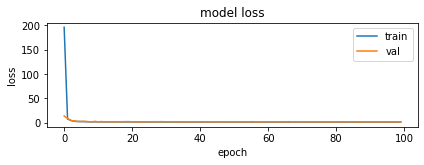

In [26]:
# plotting the metrics
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

plt.tight_layout()

In [27]:
# 4. Evaluate the model.
model.evaluate(
  X_test,
  y_test
)

497/497 [==============================] - 0s 388us/step - loss: 1.5400 - mae: 0.7247


[1.5400011539459229, 0.7246764302253723]

In [28]:
# 5. Prediction
predictions = model.predict(X_test[:10])
predictions = predictions.reshape(-1,)

# Check our predictions against the ground truths.
actual_predict = pd.DataFrame({
    'predictions': predictions,
    'Actual values': y_test[:10]
})
actual_predict

,predictions,Actual values
74863,97.604950,97.21
50137,123.028069,122.23
61698,57.597710,58.78
75676,69.562737,69.33
25380,71.069916,71.98
68984,71.369690,71.54
58204,101.591515,101.67
18557,71.459152,71.12
63766,70.258743,69.35
60932,109.489090,109.16


In [67]:
# Save the model to disk.
model.save_weights('../model/model.h5')

In [ ]:
# Load the model's saved weights.
#model.load_weights('../model/model.h5')

# Deploy model on the race(17/04/2021)'s results

In [31]:
last_race = pd.read_csv("../data/actual_17042021.csv")
last_race = last_race[0:14]
last_race

,Unnamed: 0,horse_age,horse_rating,horse_gear,declared_weight,actual_weight,draw,surface,distance,race_class,...,config_C+3,going_GOOD,going_GOOD TO FIRM,going_GOOD TO YIELDING,going_SLOW,going_SOFT,going_WET FAST,going_WET SLOW,going_YIELDING,going_YIELDING TO SOFT
0,0,6,65,1,1220,116,11,0,1400,3,...,1,1,0,0,0,0,0,0,0,0
1,1,4,75,1,1195,133,8,0,1400,3,...,1,1,0,0,0,0,0,0,0,0
2,2,4,65,1,1139,120,7,0,1400,3,...,1,1,0,0,0,0,0,0,0,0
3,3,4,65,1,1023,123,12,0,1400,3,...,1,1,0,0,0,0,0,0,0,0
4,4,5,70,0,1307,128,5,0,1400,3,...,1,1,0,0,0,0,0,0,0,0
5,5,5,68,1,1100,126,9,0,1400,3,...,1,1,0,0,0,0,0,0,0,0
6,6,5,61,0,1166,119,1,0,1400,3,...,1,1,0,0,0,0,0,0,0,0
7,7,4,62,1,1055,120,10,0,1400,3,...,1,1,0,0,0,0,0,0,0,0
8,8,6,60,1,1038,113,14,0,1400,3,...,1,1,0,0,0,0,0,0,0,0
9,9,4,71,1,1143,129,2,0,1400,3,...,1,1,0,0,0,0,0,0,0,0


In [35]:
last_race = last_race.drop(columns=['Unnamed: 0'])

In [36]:
# normalization
last_race_test_X = sc.fit_transform(last_race)

In [37]:
predictions = model.predict(last_race_test_X)

# Print our model's predictions.
print(predictions)

[[82.50385 ]
 [82.23538 ]
 [82.41155 ]
 [82.76479 ]
 [82.543076]
 [82.33229 ]
 [81.67556 ]
 [82.486595]
 [82.638054]
 [82.5182  ]
 [82.68606 ]
 [82.34307 ]
 [82.21943 ]
 [82.25655 ]]


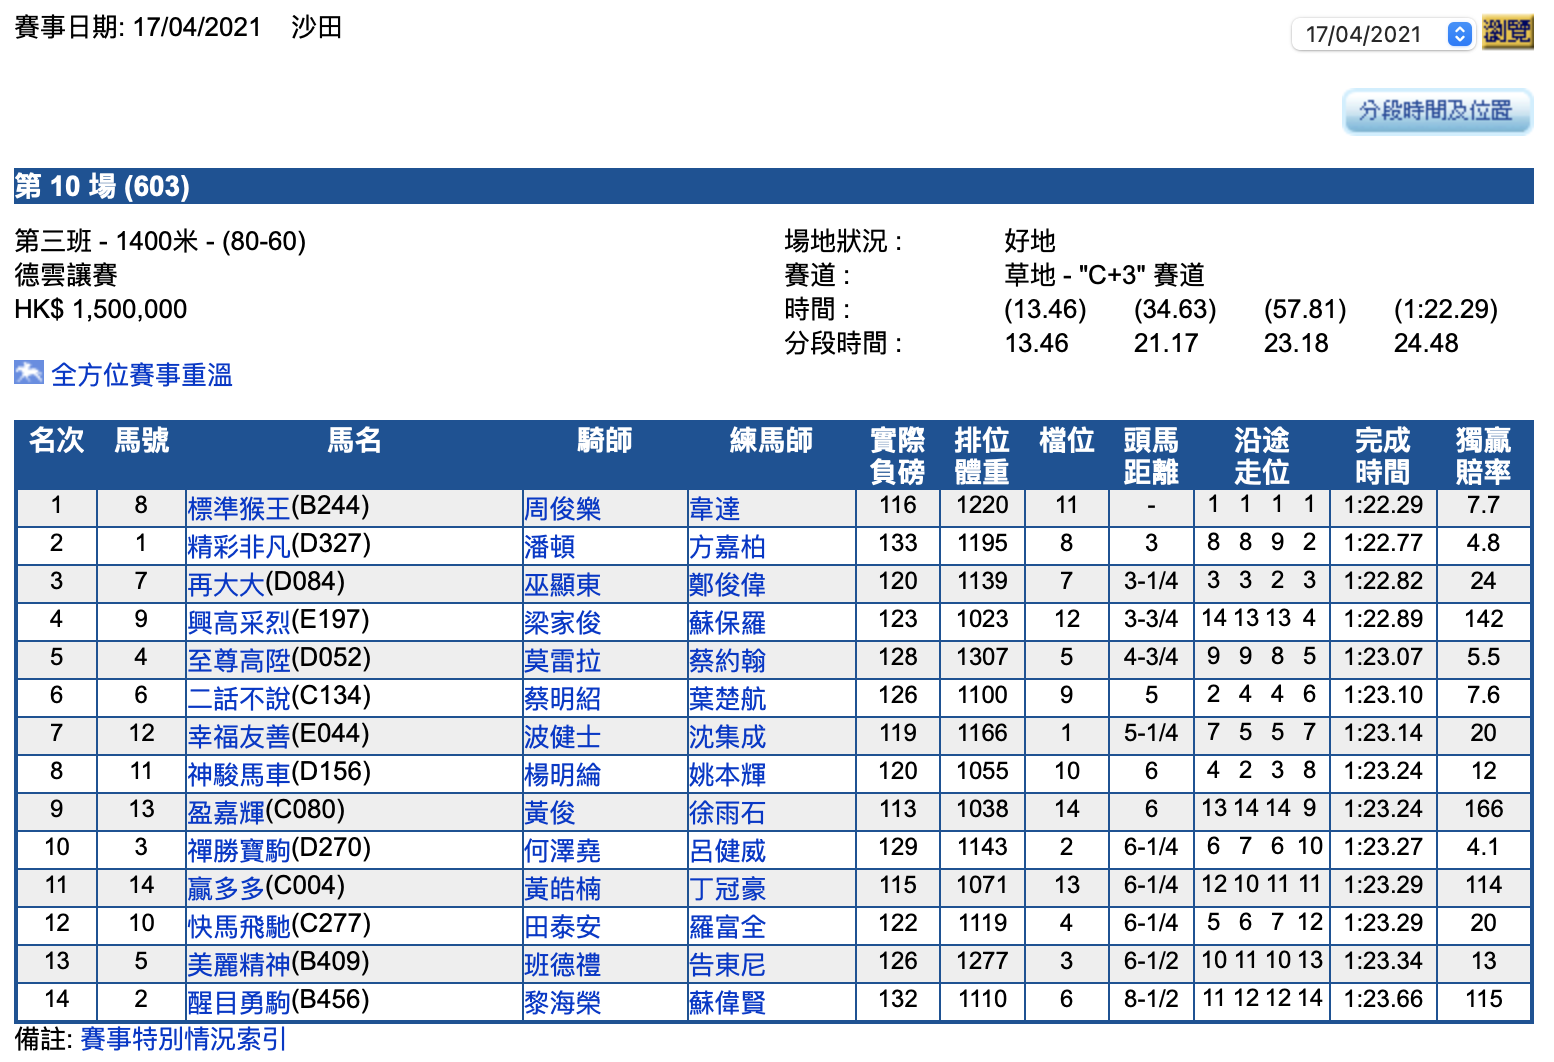

In [65]:
#last_race.to_csv("../data/actual_17042021.csv")

# 2nd Model (to check whether number of neurons affecting the result)

In [38]:
model2 = Sequential()

model2.add(Dense(64, activation='relu', input_dim = 47))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1))

In [39]:
# 2. Compile the model
model2.compile(loss='mse', optimizer='adam', metrics=['mae'])

# 3. Train the model
# history = model.fit(train_x, train_y, batch_size=batch_size, epochs=training_epochs,  validation_data=(test_x, test_y))
#history = model.fit(train_x, train_y, batch_size=batch_size, epochs=training_epochs, validation_split=0.3)
history2 = model2.fit(X_train, y_train, batch_size = 10, epochs = 100, validation_data=(X_test,y_test))

Epoch 1/100
6356/6356 [==============================] - 5s 731us/step - loss: 478.3881 - mae: 8.8612 - val_loss: 6.0769 - val_mae: 1.4948
Epoch 2/100
6356/6356 [==============================] - 5s 714us/step - loss: 5.1632 - mae: 1.4476 - val_loss: 9.3204 - val_mae: 2.1897
Epoch 3/100
6356/6356 [==============================] - 5s 716us/step - loss: 3.7269 - mae: 1.2453 - val_loss: 11.8138 - val_mae: 2.8753
Epoch 4/100
6356/6356 [==============================] - 5s 708us/step - loss: 3.0378 - mae: 1.1523 - val_loss: 3.7264 - val_mae: 1.0994
Epoch 5/100
6356/6356 [==============================] - 5s 711us/step - loss: 2.8798 - mae: 1.1092 - val_loss: 4.9914 - val_mae: 1.3063
Epoch 6/100
6356/6356 [==============================] - 5s 719us/step - loss: 2.6417 - mae: 1.0691 - val_loss: 3.6693 - val_mae: 1.2528
Epoch 7/100
6356/6356 [==============================] - 5s 714us/step - loss: 2.3521 - mae: 1.0313 - val_loss: 3.9407 - val_mae: 1.0779
Epoch 8/100
6356/6356 [===============

6356/6356 [==============================] - 4s 699us/step - loss: 1.5168 - mae: 0.8103 - val_loss: 3.5765 - val_mae: 1.1635
Epoch 61/100
6356/6356 [==============================] - 5s 716us/step - loss: 1.3691 - mae: 0.8094 - val_loss: 3.0040 - val_mae: 0.9297
Epoch 62/100
6356/6356 [==============================] - 5s 714us/step - loss: 1.4900 - mae: 0.7977 - val_loss: 3.0946 - val_mae: 0.9618
Epoch 63/100
6356/6356 [==============================] - 5s 716us/step - loss: 1.3318 - mae: 0.7904 - val_loss: 2.6656 - val_mae: 0.8805
Epoch 64/100
6356/6356 [==============================] - 5s 718us/step - loss: 1.3811 - mae: 0.7956 - val_loss: 2.8781 - val_mae: 0.9365
Epoch 65/100
6356/6356 [==============================] - 5s 724us/step - loss: 1.3632 - mae: 0.7980 - val_loss: 3.0618 - val_mae: 0.9776
Epoch 66/100
6356/6356 [==============================] - 5s 709us/step - loss: 1.4887 - mae: 0.8104 - val_loss: 3.2086 - val_mae: 1.0402
Epoch 67/100
6356/6356 [=======================

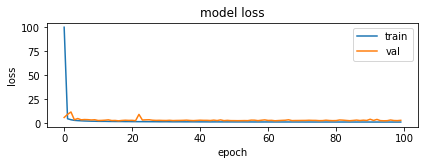

In [44]:
# plotting the metrics
plt.subplot(2,1,2)
plt.plot(model2.history.history['loss'])
plt.plot(model2.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

plt.tight_layout()

In [ ]:
# Predict on the first 5 test images.
predictions = model.predict(X_test[:10])

# Print our model's predictions.
print(predictions)

# Check our predictions against the ground truths.
print(y_test[:10])

# 3rd Model (to check whether number of hidden layers affecting the result)

In [41]:
model3 = Sequential()

model3.add(Dense(19, activation='relu', input_dim = 47))
model3.add(Dense(19, activation='relu'))
model3.add(Dense(19, activation='relu'))
model3.add(Dense(19, activation='relu'))
model3.add(Dense(19, activation='relu'))
model3.add(Dense(19, activation='relu'))
model3.add(Dense(1))

In [42]:
# 2. Compile the model
model3.compile(loss='mse', optimizer='adam', metrics=['mae'])

# 3. Train the model
# history = model.fit(train_x, train_y, batch_size=batch_size, epochs=training_epochs,  validation_data=(test_x, test_y))
#history = model.fit(train_x, train_y, batch_size=batch_size, epochs=training_epochs, validation_split=0.3)
history3 = model3.fit(X_train, y_train, batch_size = 10, epochs = 100, validation_data=(X_test,y_test))

Epoch 1/100
6356/6356 [==============================] - 6s 827us/step - loss: 607.5635 - mae: 11.2808 - val_loss: 6.2050 - val_mae: 1.5759
Epoch 2/100
6356/6356 [==============================] - 5s 820us/step - loss: 4.6571 - mae: 1.3585 - val_loss: 3.6373 - val_mae: 1.1347
Epoch 3/100
6356/6356 [==============================] - 5s 822us/step - loss: 3.0827 - mae: 1.1473 - val_loss: 2.9790 - val_mae: 1.0951
Epoch 4/100
6356/6356 [==============================] - 5s 830us/step - loss: 2.6224 - mae: 1.0674 - val_loss: 2.7138 - val_mae: 0.9307
Epoch 5/100
6356/6356 [==============================] - 5s 841us/step - loss: 2.8082 - mae: 1.0333 - val_loss: 2.6407 - val_mae: 0.9228
Epoch 6/100
6356/6356 [==============================] - 5s 832us/step - loss: 2.3035 - mae: 0.9903 - val_loss: 2.0871 - val_mae: 0.8974
Epoch 7/100
6356/6356 [==============================] - 5s 828us/step - loss: 2.1012 - mae: 0.9709 - val_loss: 2.3977 - val_mae: 0.9674
Epoch 8/100
6356/6356 [===============

6356/6356 [==============================] - 5s 826us/step - loss: 1.1729 - mae: 0.7413 - val_loss: 1.2614 - val_mae: 0.7206
Epoch 61/100
6356/6356 [==============================] - 5s 817us/step - loss: 1.2407 - mae: 0.7588 - val_loss: 1.2384 - val_mae: 0.7251
Epoch 62/100
6356/6356 [==============================] - 5s 828us/step - loss: 1.3263 - mae: 0.7501 - val_loss: 1.2805 - val_mae: 0.7701
Epoch 63/100
6356/6356 [==============================] - 5s 818us/step - loss: 1.3156 - mae: 0.7584 - val_loss: 1.2402 - val_mae: 0.7192
Epoch 64/100
6356/6356 [==============================] - 5s 828us/step - loss: 1.1859 - mae: 0.7470 - val_loss: 1.4908 - val_mae: 0.7858
Epoch 65/100
6356/6356 [==============================] - 5s 824us/step - loss: 1.1578 - mae: 0.7377 - val_loss: 1.2476 - val_mae: 0.7120
Epoch 66/100
6356/6356 [==============================] - 5s 829us/step - loss: 1.3463 - mae: 0.7410 - val_loss: 1.4483 - val_mae: 0.8461
Epoch 67/100
6356/6356 [=======================

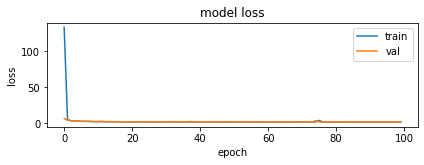

In [43]:
# plotting the metrics
plt.subplot(2,1,2)
plt.plot(model3.history.history['loss'])
plt.plot(model3.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

plt.tight_layout()